<a href="https://colab.research.google.com/github/abhinavtk1/CS6910-A2/blob/main/main_part_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MA23M002 - ABHINAV T K
# CS6910 - Assignment 2

**Github repo:** https://github.com/abhinavtk1/CS6910-A2 <br>
**Wandb report:**

In [37]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from wandb.keras import WandbCallback
import matplotlib.pyplot as plt
import cv2
#import wandb
import matplotlib.image as mpimg

In [38]:
%%capture
!curl -SL https://storage.googleapis.com/wandb_datasets/nature_12K.zip > nature_12K.zip
!unzip nature_12K.zip

train = 'inaturalist_12K/train/'
test = 'inaturalist_12K/val/'


In [39]:
classes = ['Amphibia','Animalia','Arachnida','Aves','Fungi',
           'Insecta','Mammalia','Mollusca','Plantae','Reptilia']


Exception ignored in: <function _xla_gc_callback at 0x7dbc39ae9b40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


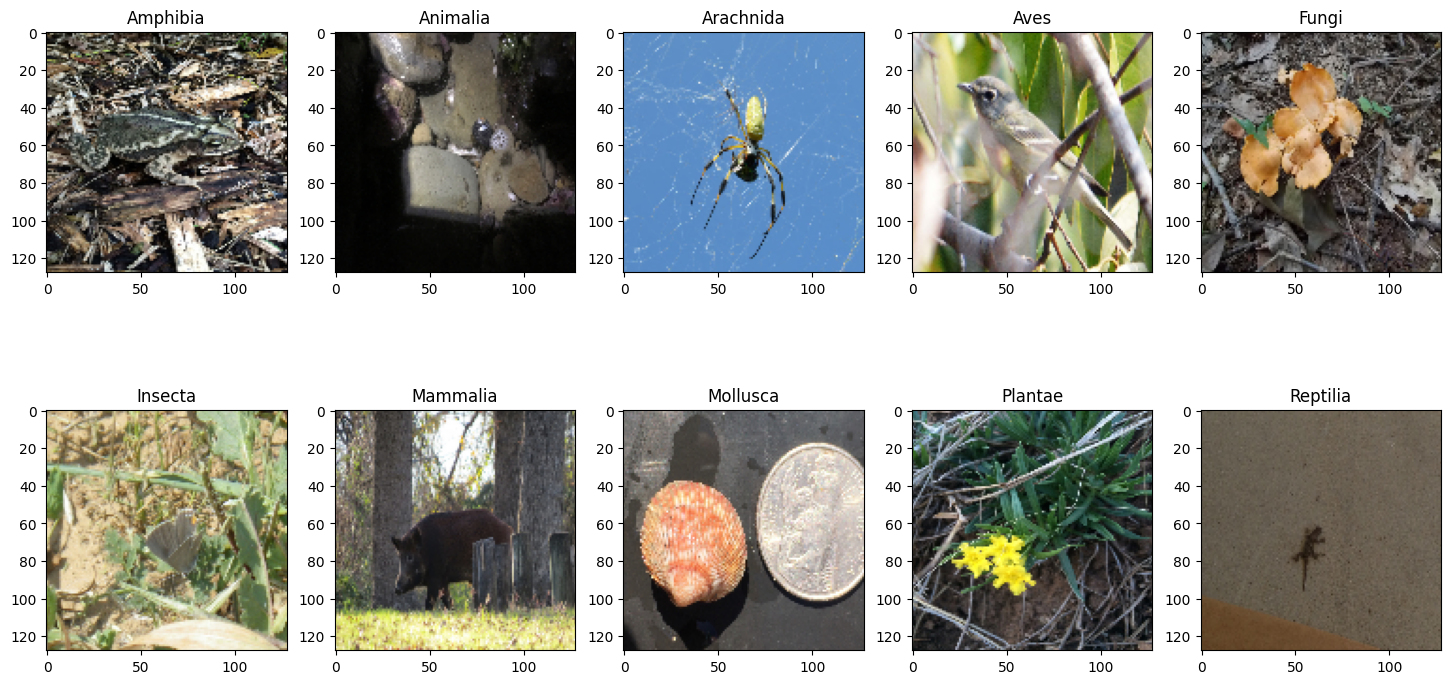

In [40]:
# visualization
fig = plt.figure(figsize=(18,9))
r, c = 2, 5
l = 1

for item in classes:
  loc = os.path.join(test, item)
  for img in os.listdir(loc):
    img_loc=(os.path.join(loc,img))
    img = mpimg.imread(img_loc)
    img = cv2.resize(img,(128,128))
    fig.add_subplot(r, c, l)
    plt.imshow(img)
    plt.title(item)
    l+=1
    break

# Part A: Training from scratch


Question 1

Define model

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [23]:
# Reference: https://machinelearningmastery.com/building-a-convolutional-neural-network-in-pytorch/

class CNN(nn.Module):
    def __init__(self, num_filters = [32,32,64,64,128], kernel_size = [3]*5, act_fn = 'relu', num_neurons = 512):
        super().__init__()

        #Conv layer 1
        self.conv1 = nn.Conv2d(3, num_filters[0],
                               kernel_size=(kernel_size[0],kernel_size[0]),
                               stride=1, padding=1)
        if act_fn=='relu':
          self.act1 = nn.ReLU()
        elif act_fn=='tanh':
          self.act1 = nn.Tanh()
        elif act_fn=='sigmoid':
          self.act1 = nn.Sigmoid()
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))

        #Conv layer 2
        self.conv2 = nn.Conv2d(num_filters[0], num_filters[1],
                               kernel_size=(kernel_size[1],kernel_size[1]),
                               stride=1, padding=1)
        if act_fn=='relu':
          self.act2 = nn.ReLU()
        elif act_fn=='tanh':
          self.act2 = nn.Tanh()
        elif act_fn=='sigmoid':
          self.act2 = nn.Sigmoid()
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))

        #Conv layer 3
        self.conv3 = nn.Conv2d(num_filters[1], num_filters[2],
                               kernel_size=(kernel_size[2],kernel_size[2]),
                               stride=1, padding=1)
        if act_fn=='relu':
          self.act3 = nn.ReLU()
        elif act_fn=='tanh':
          self.act3 = nn.Tanh()
        elif act_fn=='sigmoid':
          self.act3 = nn.Sigmoid()
        self.pool3 = nn.MaxPool2d(kernel_size=(2, 2))

        #Conv layer 4
        self.conv4 = nn.Conv2d(num_filters[2], num_filters[3],
                               kernel_size=(kernel_size[3],kernel_size[3]),
                               stride=1, padding=1)
        if act_fn=='relu':
          self.act4 = nn.ReLU()
        elif act_fn=='tanh':
          self.act4 = nn.Tanh()
        elif act_fn=='sigmoid':
          self.act4 = nn.Sigmoid()
        self.pool4 = nn.MaxPool2d(kernel_size=(2, 2))

        #Conv layer 5
        self.conv5 = nn.Conv2d(num_filters[3], num_filters[4],
                               kernel_size=(kernel_size[4],kernel_size[4]),
                               stride=1, padding=1)
        if act_fn=='relu':
          self.act5 = nn.ReLU()
        elif act_fn=='tanh':
          self.act5 = nn.Tanh()
        elif act_fn=='sigmoid':
          self.act5 = nn.Sigmoid()
        self.pool5 = nn.MaxPool2d(kernel_size=(2, 2))

        # Flatten
        self.flatten = nn.Flatten()

        # dense layer
        self.fc6 = nn.Linear(2048, num_neurons)
        if act_fn=='relu':
          self.act6 = nn.ReLU()
        elif act_fn=='tanh':
          self.act6 = nn.Tanh()
        elif act_fn=='sigmoid':
          self.act6 = nn.Sigmoid()

        # output layer
        self.fc7 = nn.Linear(num_neurons, 10)


    def forward(self, x):
        # input 3x128x128, output 32x128x128
        x = self.act1(self.conv1(x))
        # input 32x128x128, output 32x64x64
        x = self.pool1(x)

        # input 32x64x64, output 32x64x64
        x = self.act2(self.conv2(x))
        # input 32x64x64, output 32x32x32
        x = self.pool2(x)

        # input 32x32x32, output 64x32x32
        x = self.act3(self.conv3(x))
        # input 64x32x32, output 64x16x16
        x = self.pool3(x)

        # input 64x16x16, output 64x16x16
        x = self.act4(self.conv4(x))
        # input 64x16x16, output 64x8x8
        x = self.pool4(x)

        # input 64x8x8, output 128x8x8
        x = self.act5(self.conv5(x))
        # input 128x8x8, output 128x4x4
        x = self.pool5(x)

        # input 128,4,4 output 2048
        x = self.flatten(x)

        # input 2048, output 512
        x = self.act6(self.fc6(x))

        # input 512, output 10
        x = self.fc7(x)

        return x

In [24]:
# Loading data
import torch
from torchvision import transforms, datasets

# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/MyDrive/CS6910-A2/val'
test_dir = '/content/drive/MyDrive/CS6910-A2/val'
IMG_SIZE = (128,128)
batch_size = 32

# Transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),  # Resize the images
    transforms.ToTensor() ])           # Convert images to PyTorch tensors
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images


# Use ImageFolder to create a dataset
trainset = datasets.ImageFolder(root=train_dir, transform=transform)
testset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create a DataLoader for the dataset
dataloader_train = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

n_epochs = 2
for epoch in range(n_epochs):
    for inputs, labels in dataloader_train:
        # forward, backward, and then weight update
        y_pred = model(inputs)
        loss = loss_fn(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    acc = 0
    count = 0
    for inputs, labels in dataloader_test:
        y_pred = model(inputs)
        acc += (torch.argmax(y_pred, 1) == labels).float().sum()
        count += len(labels)
    acc /= count
    print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))


Epoch 0: model accuracy 10.05%
Epoch 1: model accuracy 12.65%
